<a href="https://colab.research.google.com/github/RAks55/Retinal-Multiclassification/blob/main/MulticlassResnet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers
from tensorflow.python.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
img_width=224; img_height=224
batch_size=32

In [ ]:
TRAINING_DIR = '/content/drive/MyDrive/OCT2017/train'

train_datagen = ImageDataGenerator(rescale = 1/255.0)
                                

train_generator = train_datagen.flow_from_directory(TRAINING_DIR,
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    target_size=(img_height, img_width))

Found 12000 images belonging to 4 classes.


In [ ]:
VALIDATION_DIR = '/content/drive/MyDrive/OCT2017/val'

validation_datagen = ImageDataGenerator(rescale = 1/255.0)

validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR,
                                                              batch_size=batch_size,
                                                              class_mode='categorical',
                                                              target_size=(img_height, img_width)
                                                             )

Found 1200 images belonging to 4 classes.


In [ ]:
TEST_DIR = '/content/drive/MyDrive/OCT2017/test'

test_datagen = ImageDataGenerator(rescale = 1/255.0)

test_generator = validation_datagen.flow_from_directory(TEST_DIR,
                                                              batch_size=batch_size,
                                                              class_mode='categorical',
                                                              target_size=(img_height, img_width)
                                                             )

Found 968 images belonging to 4 classes.


In [ ]:
train_generator.class_indices

{'CNV': 0, 'DME': 1, 'DRUSEN': 2, 'NORMAL': 3}

In [ ]:
resnet_model = Sequential()

pretrained_model= tf.keras.applications.ResNet50(include_top=False,
                   input_shape=(224,224,3),
                   pooling='avg',classes=4,
                   weights='imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False

resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation='relu'))
resnet_model.add(Dense(4, activation='softmax'))
resnet_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 module_wrapper_6 (ModuleWra  (None, 2048)             0         
 pper)                                                           
                                                                 
 module_wrapper_7 (ModuleWra  (None, 512)              1049088   
 pper)                                                           
                                                                 
 module_wrapper_8 (ModuleWra  (None, 4)                2052      
 pper)                                                           
                                                                 
Total params: 24,638,852
Trainable params: 1,051,140
Non-trainable params: 23,587,712
__________________________________

In [ ]:
callbacks = EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='auto')
# autosave best Model
best_model_file = '/content/CNN_aug_best_weights.h5'
best_model = ModelCheckpoint(best_model_file, monitor='val_acc', verbose = 1, save_best_only = True)

In [ ]:
resnet_model.compile(optimizer=Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
history = resnet_model.fit(train_generator,
                              epochs=110,
                              verbose=1,
                              validation_data=validation_generator,
                              callbacks = [best_model]
                              )

Epoch 1/110
375/375 [==============================] - 68s 180ms/step - loss: 0.8529 - accuracy: 0.6519 - val_loss: 0.9887 - val_accuracy: 0.6033
Epoch 2/110
375/375 [==============================] - 68s 180ms/step - loss: 0.8598 - accuracy: 0.6547 - val_loss: 1.0139 - val_accuracy: 0.5833
Epoch 3/110
375/375 [==============================] - 68s 181ms/step - loss: 0.8345 - accuracy: 0.6633 - val_loss: 0.9410 - val_accuracy: 0.6292
Epoch 4/110
375/375 [==============================] - 67s 179ms/step - loss: 0.8335 - accuracy: 0.6647 - val_loss: 1.0523 - val_accuracy: 0.5592
Epoch 5/110
375/375 [==============================] - 67s 179ms/step - loss: 0.8387 - accuracy: 0.6666 - val_loss: 0.9994 - val_accuracy: 0.5892
Epoch 6/110
375/375 [==============================] - 67s 179ms/step - loss: 0.8258 - accuracy: 0.6692 - val_loss: 0.9414 - val_accuracy: 0.6333
Epoch 7/110
375/375 [==============================] - 67s 180ms/step - loss: 0.8253 - accuracy: 0.6713 - val_loss: 0.9595 -

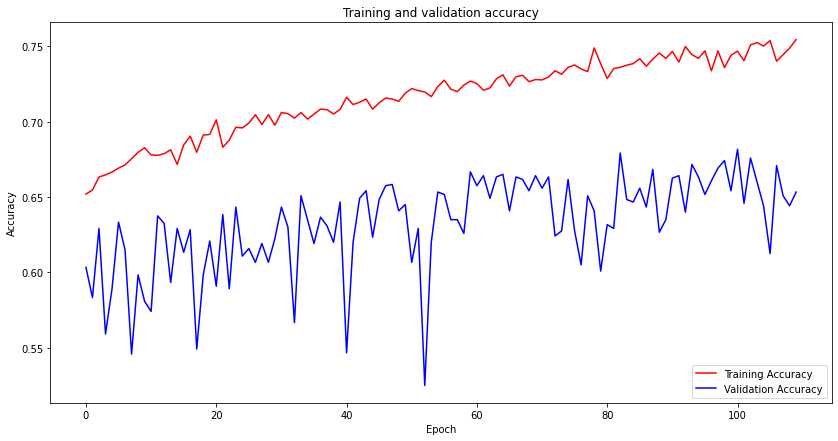

In [ ]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc))

fig = plt.figure(figsize=(14,7))
plt.plot(epochs, acc, 'r', label="Training Accuracy")
plt.plot(epochs, val_acc, 'b', label="Validation Accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc='lower right')
plt.show()

Text(0.5, 1.0, 'Training and validation loss')

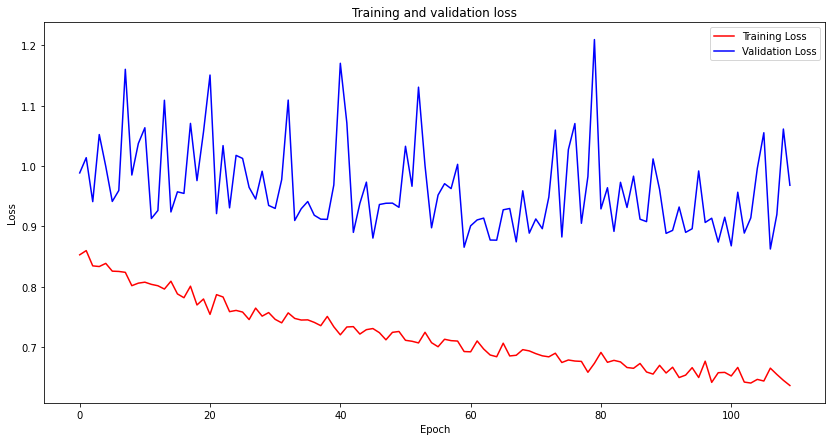

In [ ]:
fig2 = plt.figure(figsize=(14,7))
plt.plot(epochs, loss, 'r', label="Training Loss")
plt.plot(epochs, val_loss, 'b', label="Validation Loss")
plt.legend(loc='upper right')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and validation loss')